In [ ]:
import torch
import numpy 
import torch.nn as nn
import torch.nn.functional as F

#关于word embedding 以序列建模

batch_size=2
max_num_src_words=8
max_num_tgt_words=8
#序列的最大长度
max_src_seq_len=5
max_tgt_seq_len=5
#以上是初始化规模

#src_len=torch.randint(2,5,(batch_size,))
#tgt_len=torch.randint(2,5,(batch_size,))
src_len=torch.Tensor([2,4]).to(torch.int32)
tgt_len=torch.Tensor([4,3]).to(torch.int32)
#位置索引


#单词索引构成的句子

src_seq=torch.cat(
        [torch.unsqueeze(
            F.pad(
                torch.randint(1,max_num_src_words,(L,)),
                (0,max_src_seq_len-L))
        ,0) 
    for L in src_len])
#torch.randint(min,max,size)      在min和max之间随机数，用来生成size形状的序列      不写就是向量，,1表示一维向量
#F.pad(x,(num,len)) 在x右侧填充len个num     保持对齐
#torch.unsqueeze(x,0)  在维度0上增加一个维度
#torch.cat()        将所有样本在第0维拼接

tgt_seq=torch.cat(
        [torch.unsqueeze(
            F.pad(
                torch.randint(1,max_num_tgt_words,(L,)),
                (0,max_tgt_seq_len-L))
        ,0) 
    for L in tgt_len])
print(src_seq)
print(tgt_seq)
#根据前面规定的最大字类别范围，在这个最大范围里随机生成 长度为规定len的序列，并填充0以保证对齐，拼接
#src_len 为2，4 则生成src_seq为2个数，4个数     tgt同理

tensor([[5, 1, 0, 0, 0],
        [5, 3, 2, 1, 0]])
tensor([[6, 4, 1, 7, 0],
        [1, 6, 7, 0, 0]])


In [22]:
#构造word embedding
model_dim=8
#特征大小。paper中为512
src_embedding_table=nn.Embedding(max_num_src_words+1,model_dim)
tgt_embedding_table=nn.Embedding(max_num_tgt_words+1,model_dim)
#先根据最大子类别范围和人为规定的维度深度生成字典，这个字典是实现人类可读文字和计算机可读字典的转换

#print("src_embedding_table:",src_embedding_table)
#print(src_embedding_table.weight)

src_embedding=src_embedding_table(src_seq)
#print(src_seq)
#print(src_embedding)


#src_embedding_table 文字转embedding的字典
#src_seq原文
#src_embedding 根据字典转译后的形式
#[[ 3,7,0,0,0],
# [2,1,4,6,0] ]
#第一维度的第一个元素为3，查看字典，字典从0开始，第四行就表示3
#刚好相对应
tgt_embedding=tgt_embedding_table(tgt_seq)

#根字典，将最开始设置好的seq序列转换为计算机可读的形式


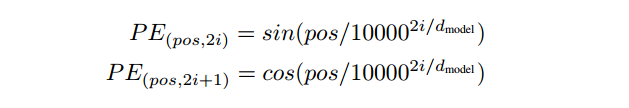

In [23]:
#构建Position embedding
from PIL import Image
img = Image.open("/home/code/transformer/position_embedding.png")
img.show()
#构造频率因子的原理公式


In [ ]:
max_position_len=5
#公式里的pos取值
pos_mat=torch.arange(max_position_len).reshape((-1,1))#只有一列
#将pos的所有可能都罗列出来，转换为一列的形式
# print(pos_mat)
#reshape((-1,1))    -1表示自动计算维度大小  (n,)计算后(n,1) 一行变成二维    (3,4) 12个元素，12/1=12，变成(12,1)
#第二个数表示  最小单位的[] 里面有几个元素
#公式里的i取值
i_mat=torch.pow(10000,torch.arange(0,8,2).reshape((1,-1))/model_dim)
#将i的可能都罗列出来，转换成一行的形式
#print(i_mat)
#pe_embedding_table初始化
pe_embedding_table=torch.zeros(max_position_len,model_dim)
#先初始化一个pe频率因子的存储矩阵
#print("初始化pe_embedding_table)：",pe_embedding_table)
pe_embedding_table[:,0::2]=torch.sin(pos_mat/i_mat)
pe_embedding_table[:,1::2]=torch.cos(pos_mat/i_mat)
#根据公式，将所有的位置点重新计算
#print("计算频率因子（正弦/余弦函数的频率控制）pe_embedding_table\n:",pe_embedding_table)

pe_embedding=nn.Embedding(max_position_len,model_dim)
#生成一个字典，max_position_len种元素，每个元素深度是model_dim  paper中深度设为512，该模型代码设为8
pe_embedding.weight=nn.Parameter(pe_embedding_table,requires_grad=False)
#将预计算的位置编码表设置为嵌入层权重
#并不是转换数据，而是将赋予普通张量特殊的功能和属性
#和前面一样，初始化一个字典，然后将频率因子的矩阵转换成计算机可读的矩阵

src_pos=torch.cat(
                [torch.unsqueeze
                        (torch.arange
                                    (max(src_len))
                        ,0) for _ in src_len]).to(torch.int32)
#_ 是占位符，不实际使用序列长度值
#只是表示 seq是根据src_len的列数生成随机元素，然后用0填满max(src_len)       所以是
#pos则表示为每一个元素(即便是填充0)都加上一个位置编码，所以行数是seq的行数，列数是seq的列数
tgt_pos=torch.cat(
                [torch.unsqueeze
                        (torch.arange
                                    (max(tgt_len))
                        ,0) for _ in tgt_len]).to(torch.int32)

src_pos_embedding=pe_embedding(src_pos)
tgt_pos_embedding=pe_embedding(tgt_pos)
#使用pe_embedding这个字段，将我们初始化的位置编码转换为计算机可读的形式


In [ ]:
#softmax演示
alpha1=0.1
alpha2=10
score=torch.rand(5)
print(score)

def softmax_func(score):
    return F.softmax(score)

jaco_mat1=torch.autograd.functional.jacobian(softmax_func,score*alpha1)
jaco_mat2=torch.autograd.functional.jacobian(softmax_func,score*alpha2)
#求导以后直接求没了
print(jaco_mat1)
print(jaco_mat2)

tensor([0.6702, 0.2981, 0.4245, 0.8224, 0.9100])
tensor([[ 0.1605, -0.0389, -0.0394, -0.0410, -0.0413],
        [-0.0389,  0.1561, -0.0379, -0.0395, -0.0398],
        [-0.0394, -0.0379,  0.1576, -0.0400, -0.0403],
        [-0.0410, -0.0395, -0.0400,  0.1623, -0.0420],
        [-0.0413, -0.0398, -0.0403, -0.0420,  0.1634]])
tensor([[ 5.6336e-02, -8.6921e-05, -3.0763e-04, -1.6449e-02, -3.9492e-02],
        [-8.6921e-05,  1.4483e-03, -7.4455e-06, -3.9813e-04, -9.5583e-04],
        [-3.0763e-04, -7.4455e-06,  5.1069e-03, -1.4090e-03, -3.3828e-03],
        [-1.6449e-02, -3.9813e-04, -1.4090e-03,  1.9914e-01, -1.8089e-01],
        [-3.9492e-02, -9.5583e-04, -3.3828e-03, -1.8089e-01,  2.2472e-01]])


/tmp/ipykernel_8351/523690113.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(score)


In [87]:
#构造encoder的self_attention mask
#mask的shape [batch_size,max_src_len,max_src_len]   值为1或-inf
#batch_size 每个样本都有自己的掩码
#max_src_len 注意我
#max_src_len 注意你
#主要看attention的公式，Q和K转置的乘法  虽然是三维矩阵，只关注Batch内部相乘就行

# 
# valid_encoder_pos_matrix=torch.bmm(valid_encoder_pos,valid_encoder_pos.transpose(1,2))



valid_encoder_pos = torch.unsqueeze(#扩容，batch_size,max_scr_len扩容为batch_size,max_scr_len,1     下一步bmm矩阵乘法
                        torch.cat(#将src_len不同的拼接
                            [torch.unsqueeze(#将向量转换为矩阵
                                F.pad(
                                    torch.ones(L), 
                                    (0, max(src_len) - L)#初始化位置函数，那些位置有效，哪些位置为pad
                                ),
                                0
                            ) 
                            for L in src_len]
                        ),
                        2
                )   
valid_encoder_pos_matrix=torch.bmm(valid_encoder_pos,valid_encoder_pos.transpose(1,2))
#指明seq的有效位置，因为seq有0填充位
invalid_encoder_pos_matrix=1-valid_encoder_pos_matrix
mask_encoder_self_attention=invalid_encoder_pos_matrix.to(torch.bool)
print(mask_encoder_self_attention)

tensor([[[False, False,  True,  True],
         [False, False,  True,  True],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]],

        [[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]])


In [90]:
import numpy as np
score=torch.randn(batch_size,max(src_len),max(src_len))
print("score:\n",score)
masked_score=score.masked_fill(mask_encoder_self_attention,-np.inf)
print("masked_score:\n",masked_score)
prob=F.softmax(masked_score,-1)
print("prob:\n",prob)


score:
 tensor([[[ 0.0671, -0.4546, -0.3829, -1.1251],
         [ 0.3292, -0.5040,  0.4688,  0.7391],
         [ 0.7421,  0.8774,  0.3877,  1.5007],
         [ 1.8332, -1.4623,  1.7985,  0.9152]],

        [[-0.8551, -0.0254, -0.0664,  1.6755],
         [ 0.9452, -1.2291,  0.0351, -0.6641],
         [ 0.1715,  2.4018, -0.8842, -1.2335],
         [-1.6457,  0.3561, -1.1543, -0.5307]]])
masked_score:
 tensor([[[ 0.0671, -0.4546,    -inf,    -inf],
         [ 0.3292, -0.5040,    -inf,    -inf],
         [   -inf,    -inf,    -inf,    -inf],
         [   -inf,    -inf,    -inf,    -inf]],

        [[-0.8551, -0.0254, -0.0664,  1.6755],
         [ 0.9452, -1.2291,  0.0351, -0.6641],
         [ 0.1715,  2.4018, -0.8842, -1.2335],
         [-1.6457,  0.3561, -1.1543, -0.5307]]])
prob:
 tensor([[[0.6275, 0.3725, 0.0000, 0.0000],
         [0.6970, 0.3030, 0.0000, 0.0000],
         [   nan,    nan,    nan,    nan],
         [   nan,    nan,    nan,    nan]],

        [[0.0554, 0.1270, 0.1219, 0.

In [ ]:
#intra-attention mask 内部的注意力机制
# Q * K^T   shape [batch_size,tgt_seq_len,src_seq_len]
valid_encoder_pos=torch.unsqueeze(
    torch.cat(
        [torch.unsqueeze(
            F.pad(
                torch.ones(L),
                (0,max(src_len)-L)
            ),
            0
        )
        for L in src_len]
    ),
    2
)

valid_decoder_pos=torch.unsqueeze(
    torch.cat(
        [torch.unsqueeze(
            F.pad(
                torch.ones(L),
                (0,max(tgt_len)-L)
            ),
            0
        )
        for L in tgt_len]
    ),
    2
)

valid_cross_pos_matrix=torch.bmm(valid_decoder_pos,valid_encoder_pos.transpose(1,2))

invalid_cross_pos_matrix=1-valid_cross_pos_matrix
mask_cross_attention=invalid_cross_pos_matrix.to(torch.bool)
print(mask_cross_attention)

tensor([[[False, False,  True,  True],
         [False, False,  True,  True],
         [False, False,  True,  True],
         [False, False,  True,  True]],

        [[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         [ True,  True,  True,  True]]])


In [136]:
#构造decoder self-attention的mask
valid_decoder_tri_matrix=torch.cat(
    [torch.unsqueeze(
        F.pad(
            torch.tril(
                torch.ones((L,L))
            ),
            (0,max(tgt_len)-L,0,max(tgt_len)-L)
        ),
        0
    ) 
        for L in tgt_len]
)
#for L in tgt_len只要在[]张量范围内就行
#triu up上三角矩阵      tril low下三角矩阵
#F的填充参数    N,N-1,N-2   也就是从矩阵的最后一个往前填充
#valid_decoder_tri_matrix主要是表示是否用自判断     比如tgt_len4，3 对于第二个patch，只有3个有效seq，所以第四个位置对自己和对别人都无效
invalid_decoder_tri_matrix=1-valid_decoder_tri_matrix
invalid_decoder_tri_matrix=invalid_decoder_tri_matrix.to(torch.bool)

score=torch.randn(batch_size,max(tgt_len),max(tgt_len))
masked_score=score.masked_fill(invalid_decoder_tri_matrix,-1e9)
prob=F.softmax(masked_score,-1)
print(prob)

tensor([[[1.0000, 0.0000, 0.0000, 0.0000],
         [0.1682, 0.8318, 0.0000, 0.0000],
         [0.3949, 0.0959, 0.5092, 0.0000],
         [0.7164, 0.1339, 0.1099, 0.0398]],

        [[1.0000, 0.0000, 0.0000, 0.0000],
         [0.2075, 0.7925, 0.0000, 0.0000],
         [0.3732, 0.2749, 0.3519, 0.0000],
         [0.2500, 0.2500, 0.2500, 0.2500]]])


In [ ]:
#构建 self-attention   
def scaled_dot_product_attention(Q,K,V,attention_mask):
    score=torch.bmm(Q,K.transpose(-2,-1))/torch.sqrt(model_dim)
    masked_score=score.masked_fill(attention_mask,-1e9)
    prob=F.softmax(masked_score,-1)
    context=torch.bmm(prob,V)
    return context

In [ ]:
torch.nn.Transformer